In [102]:
import re
import json
import random
from tqdm import tqdm
import matplotlib.pyplot as plt

In [ ]:
with open("reddit_jokes.json", "r") as file:
    joke_dict = json.load(file)

In [ ]:
def clean_text(text):
    text = re.sub(r'[^a-zA-Z?.\s]', '', text)
    text = text.replace("\\", " ")
    text = text.lower()
    text = re.sub(r'\s+', ' ', text)
    text = re.sub(r'[?.]', '#', text)
    text = re.sub(r'#+', '#', text)
    text = re.sub(r'\s*#\s*', '#', text)
    text = text.replace(" ", "@")
    return text

def sample_from_dictionary(prob_dict):
    chars = list(prob_dict.keys())
    probs = [float(prob_dict[c]) for c in chars]
    return random.choices(chars, weights=probs, k=1)[0]

def display_sentence(sentence):
    sentence = sentence.replace("@", " ")
    sentence = sentence.replace("#", '\n')
    print(sentence)


In [183]:
# Extracting body and title from the List of Dictionaries
text = ""
for joke in tqdm(joke_dict[:50000]):
    text = text + joke['body'] + " " + joke['title'] + "."

text = clean_text(text)

100%|██████████| 50000/50000 [01:55<00:00, 433.90it/s] 


In [184]:
# Finding out the character probabilities using frequency
independent_frequencies = {}
for character in text:
    if character not in independent_frequencies:
        independent_frequencies[character] = 1
    else:
        independent_frequencies[character] += 1

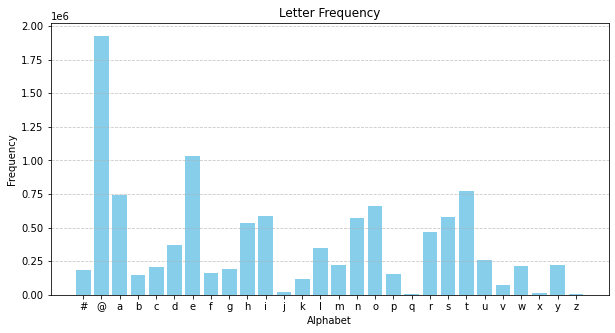

In [185]:
# Let's visualise the character probabilities
keys = sorted(independent_frequencies.keys())
values = [independent_frequencies[k] for k in keys]

plt.figure(figsize=(10, 5))
plt.bar(keys, values, color='skyblue')
plt.xlabel('Alphabet')
plt.ylabel('Frequency')
plt.title('Letter Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [186]:
# Convert the frequencies into probabilities
total_characters = sum(values)
independent_probabilities = {}
for key in independent_frequencies:
    independent_probabilities[key] = independent_frequencies[key]/total_characters

In [187]:
# Finding out the transition probabilities
transition_probabilities = {}
for character in tqdm(independent_frequencies.keys()):
    transition_frequency = {}
    for i in range(len(text)):
        if ((text[i] == character) and (i != len(text)-1)):
            transition_frequency[text[i+1]] = transition_frequency.get(text[i+1], 0) + 1

    transition_probability = {}
    total_count_a = sum(list(transition_frequency.values()))
    for key in transition_frequency:
        transition_probability[key] = transition_frequency[key]/total_count_a
    transition_probabilities[character] = transition_probability

100%|██████████| 28/28 [00:29<00:00,  1.07s/it]


In [196]:
# Let's create our first sentence
# Our seed character will be "#", indicating the beginning of the sentence - and we will end when we get another "#"
seed_character = "#"
predicted_character = sample_from_dictionary(transition_probabilities[seed_character])
sentence = predicted_character

while(predicted_character != "#"):
    predicted_character = sample_from_dictionary(transition_probabilities[predicted_character])
    sentence = sentence + predicted_character

display_sentence(sentence)

ansosain wale d o bous te ave coupa njun shet le thetelas

